In [1]:
!pip install -q kaggle

In [2]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model & evaluasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hafizhanurulqolby","key":"f42a992f6133036a0659d5d7fa222a7b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mirichoi0218/insurance
!unzip insurance.zip

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 57.9MB/s]
Archive:  insurance.zip
  inflating: insurance.csv           


In [6]:
# Load Data
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Understanding & EDA**

In [7]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Statistik ringkasan
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Cek missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


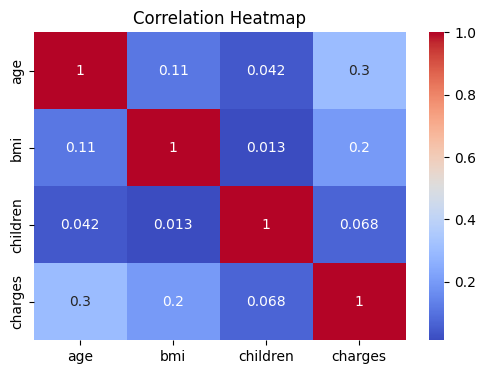

In [10]:
# Korelasi numerik
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

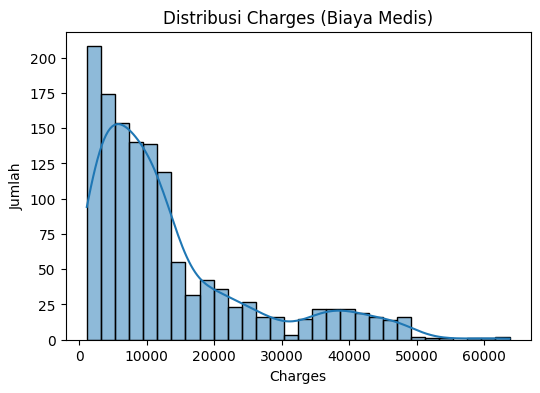

In [11]:
# Distribusi target
plt.figure(figsize=(6, 4))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribusi Charges (Biaya Medis)")
plt.xlabel("Charges")
plt.ylabel("Jumlah")
plt.show()

**Data Preparation**

In [12]:
# Pisahkan fitur dan target
X = df.drop('charges', axis=1)
y = df['charges']

In [13]:
# Fitur kategorikal untuk encoding
categorical_cols = ['sex', 'smoker', 'region']

In [14]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Modelling**

a) Linear Regression (Baseline)

In [16]:
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

b) Random Forest Regressor

In [17]:
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c) XGBoost Regressor

In [18]:
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

**Evaluasi Model**

In [19]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))
    print()

# Evaluasi semua model
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

--- Linear Regression ---
MAE : 4181.194473753643
RMSE: 5796.284659276275
R2  : 0.7835929767120722

--- Random Forest ---
MAE : 2554.3777592700917
RMSE: 4581.114617882647
R2  : 0.8648194356210239

--- XGBoost ---
MAE : 2567.3759500257843
RMSE: 4595.681477116327
R2  : 0.8639583844829724



Dengan mempertimbangkan keseluruhan metrik evaluasi, Random Forest menjadi model terbaik untuk memprediksi biaya medis berdasarkan profil pasien, karena memberikan kombinasi error rendah dan akurasi tinggi tanpa overfitting yang mencolok.

**Visualisasi**

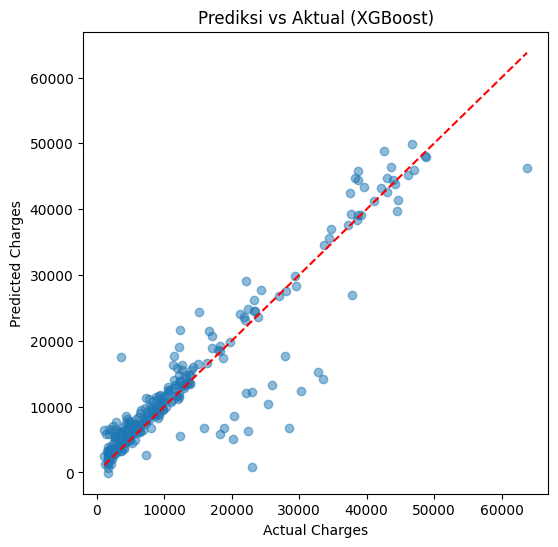

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Prediksi vs Aktual (XGBoost)")
plt.show()